In [2]:
!pip install -q missingno

In [1]:
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# lendo o arquivo csv
df = pd.read_csv("dataset.csv")

# mostrando a quantidade de linhas e colunas
# 2237 linhas - 25 colunas (variaveis)
df.shape



(2237, 25)

In [3]:
# detalhes dos dados
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,"$55,375.00",0,1,10/17/13,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,"$77,037.00",0,1,10/13/13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,"$24,163.00",1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,"$69,476.00",0,0,9/30/13,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,"$72,063.00",0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


In [4]:
# informação sobre os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         2237 non-null   int64 
 1    Ano_Nascimento            2237 non-null   int64 
 2    Educacao                  2237 non-null   object
 3    Estado_Civil              2237 non-null   object
 4    Renda                     2213 non-null   object
 5    Criancas_Em_Casa          2237 non-null   int64 
 6    Adolescentes_Em_Casa      2237 non-null   int64 
 7    Data_Cadastro_Cliente     2237 non-null   object
 8    Gasto_Vinhos              2237 non-null   int64 
 9    Gasto_Frutas              2237 non-null   int64 
 10   Gasto_Carnes              2237 non-null   int64 
 11   Gasto_Peixes              2237 non-null   int64 
 12   Gasto_Doces               2237 non-null   int64 
 13   Gasto_Outros              2237 non-null   int64 
 14   Num_Com

In [5]:
# começando a limpeza dos dados
# excluindo os espaços nos nomes das variáveis
df.columns = df.columns.str.replace(' ','')
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,"$55,375.00",0,1,10/17/13,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,"$77,037.00",0,1,10/13/13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,"$24,163.00",1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,"$69,476.00",0,0,9/30/13,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,"$72,063.00",0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


In [6]:
# a variável renda tem o caracter $, o que caracteriza que ela está como um "texto"/string e não como um
# valor numérico mesmo
df['Renda'] = df['Renda'].str.replace('$','').str.replace(',','').astype(float)

/var/folders/gc/wnk1ypv53vg8jsdwlrl46lsw0000gn/T/ipykernel_81080/2171857996.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Renda'] = df['Renda'].str.replace('$','').str.replace(',','').astype(float)


In [7]:
# a coluna de data está como tipo object, convertendo para datetime
df['Data_Cadastro_Cliente'] = pd.to_datetime(df['Data_Cadastro_Cliente'])

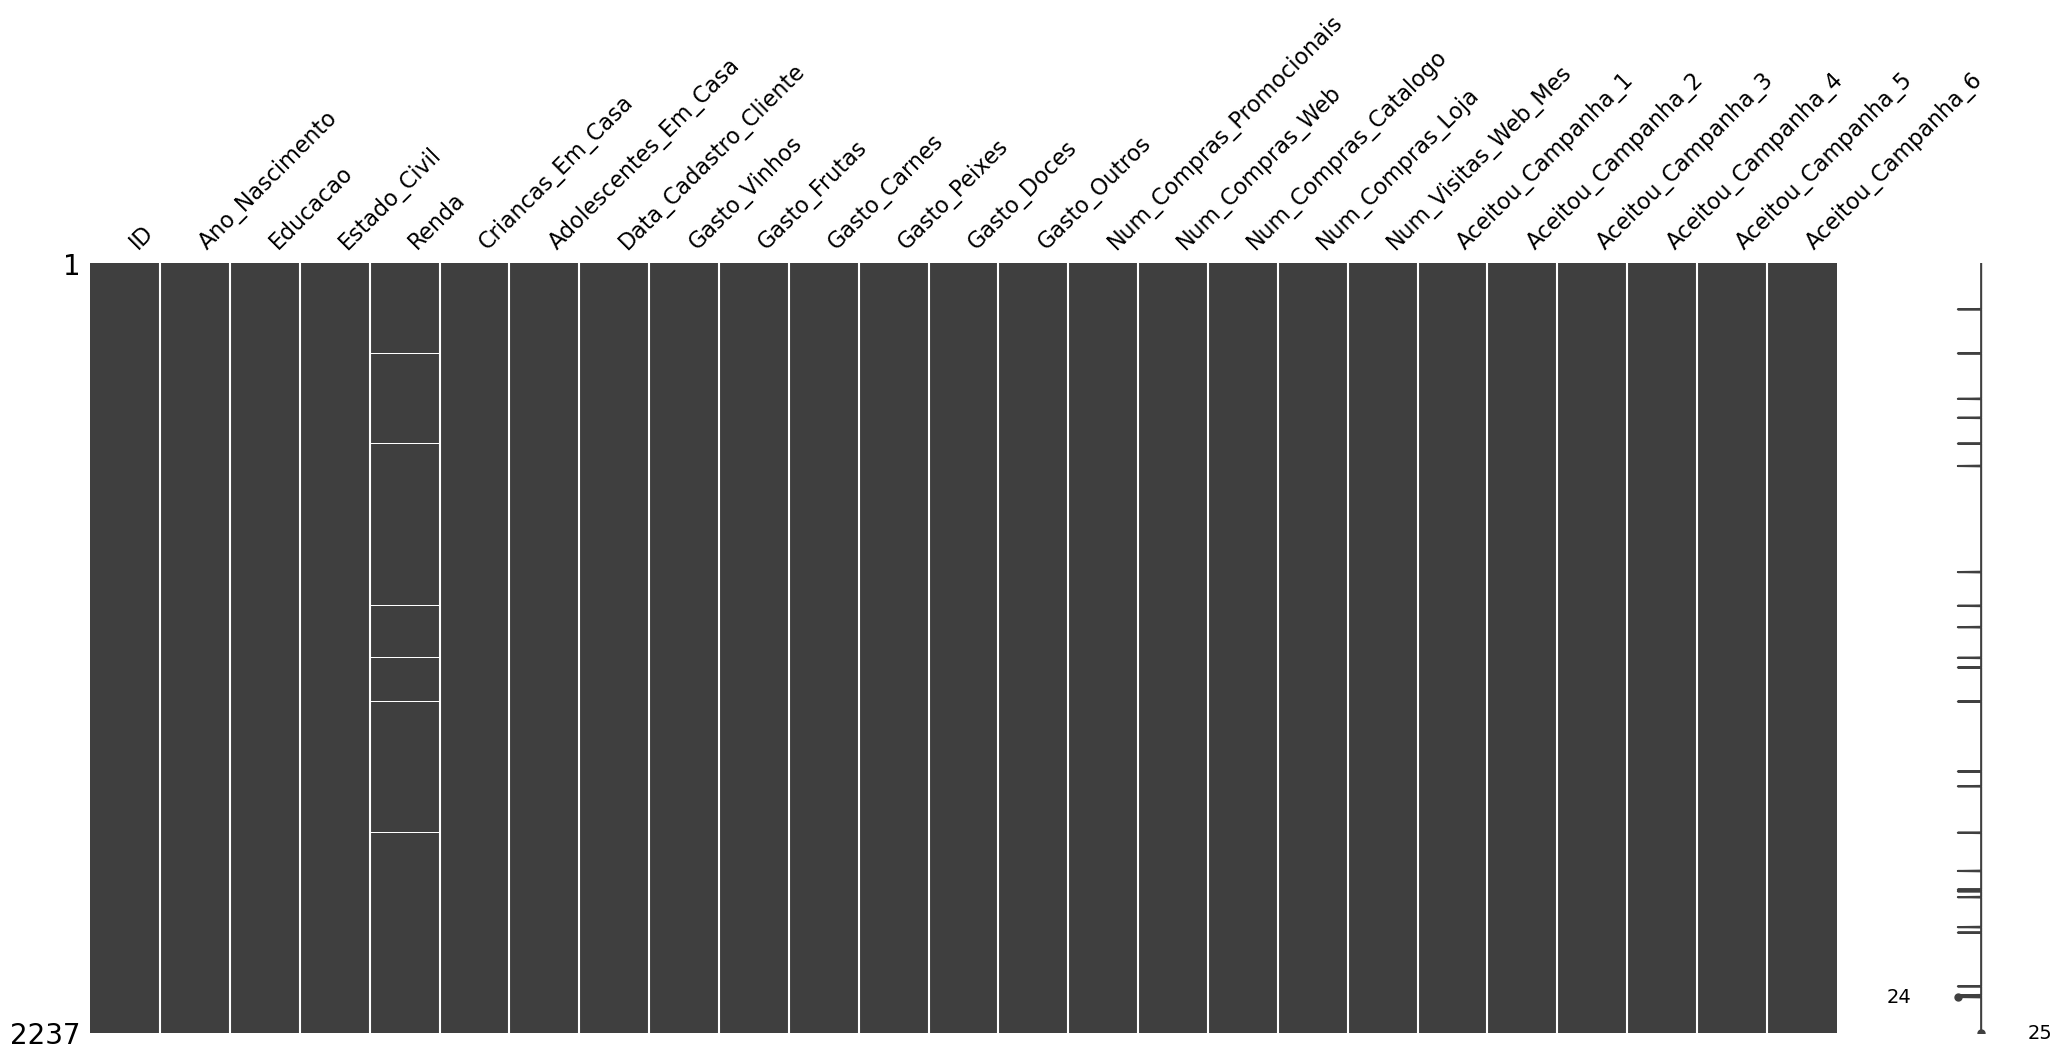

In [8]:
# verificando valores ausentes com a matrix do pacote missingno
msno.matrix(df)
plt.show()

In [9]:
# verificando todos os valores ausentes de outra forma
# neste caso, realizando uma soma de todos os valores ausentes, em todas variáveis
valores_ausentes = df.isnull().sum().sort_values(ascending = False)

In [10]:
valores_ausentes

Renda                       24
ID                           0
Gasto_Outros                 0
Aceitou_Campanha_5           0
Aceitou_Campanha_4           0
Aceitou_Campanha_3           0
Aceitou_Campanha_2           0
Aceitou_Campanha_1           0
Num_Visitas_Web_Mes          0
Num_Compras_Loja             0
Num_Compras_Catalogo         0
Num_Compras_Web              0
Num_Compras_Promocionais     0
Gasto_Doces                  0
Ano_Nascimento               0
Gasto_Peixes                 0
Gasto_Carnes                 0
Gasto_Frutas                 0
Gasto_Vinhos                 0
Data_Cadastro_Cliente        0
Adolescentes_Em_Casa         0
Criancas_Em_Casa             0
Estado_Civil                 0
Educacao                     0
Aceitou_Campanha_6           0
dtype: int64

In [11]:
# após verificar os valores ausentes
# filtro pelas colunas/variaveis que são diferentes de zero 0
print(valores_ausentes.loc[valores_ausentes != 0])

Renda    24
dtype: int64


/Users/emersonmouco/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


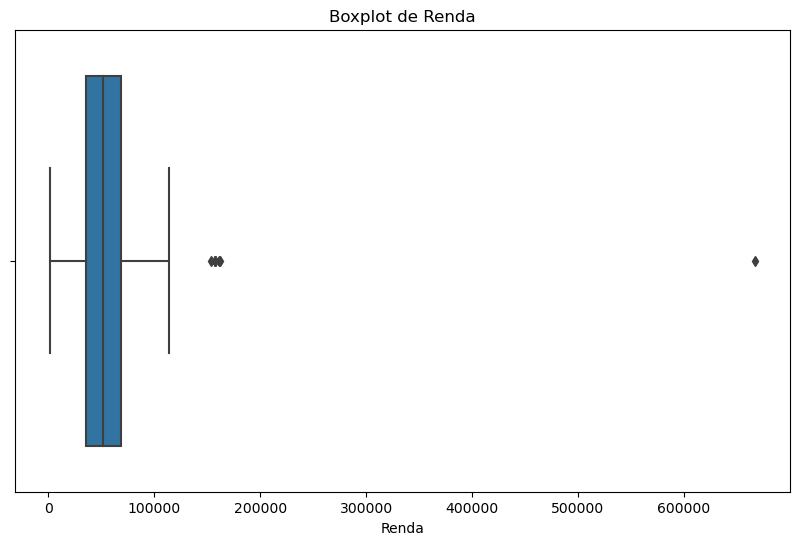

In [12]:
# antes de excluir as linhas com valores ausentes (ou tratá-los de outra maneira)
# verifico se há outliers nesta variável - mas o que são outliers?
# são valores que estão distantes do centro da distribuição
# para verificar se há outlier, utilizarei um bloxpot
plt.figure(figsize = (10,6))
sns.boxplot(df['Renda'])
plt.title('Boxplot de Renda')
plt.xlabel('Renda')
plt.show()

In [13]:
# para confirmar que são outliers 
# utilizarei outra regra estatística, a de inter quartis
Q1 = df['Renda'].quantile(0.25) # primeira linha do bloxpot 
Q3 = df['Renda'].quantile(0.75) # ultima linha do bloxpot 
IQR = Q3 - Q1 # IQR -> Intervalo interquartil 

In [14]:
# definindo os limites para considerar um ponto como outlier
# para achar os limites inferior e superior, eu faço esse padrão estatístico
# Q1 - 1.5 (padrão estatístico) * IQR
# Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
# verificando se há outliers
# a formula é qualquer valor abaixo do limite inferiro ou acima do limite inferior
# será considerado outlier
outliers = df[(df['Renda'] < lower_bound) | (df['Renda'] > upper_bound)]
outliers # o resultado será 8 linhas (registros) que são considerados outliers
# OBS: neste caso utilizei a variável renda para ver se havia outliers
# o mais correto seria analisar variável por variável e entender o que acontece
# em cada uma, pois nem sempre um outlier deverá ser excluído

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
325,4931,1977,Graduação,Casado,157146.0,0,0,2013-04-29,1,0,...,0,28,0,1,0,0,0,0,0,0
497,1501,1982,PhD,Casado,160803.0,0,0,2008-04-12,55,16,...,0,28,1,0,0,0,0,0,0,0
526,9432,1977,Graduação,Casado,666666.0,1,0,2006-02-13,9,14,...,3,1,3,6,0,0,0,0,0,0
730,1503,1976,PhD,Casado,162397.0,1,1,2006-03-13,85,1,...,0,0,1,1,0,0,0,0,0,0
851,5336,1971,Mestrado,Casado,157733.0,1,0,2006-04-13,39,1,...,1,0,1,1,0,0,0,0,0,0
1787,5555,1975,Graduação,Divorciado,153924.0,0,0,2002-07-14,1,1,...,0,0,0,0,0,0,0,0,0,0
1886,11181,1949,PhD,Casado,156924.0,0,0,2013-08-29,2,1,...,0,0,0,0,0,0,0,0,0,0
2165,8475,1973,PhD,Casado,157243.0,0,1,2003-01-14,20,2,...,0,22,0,0,0,0,0,0,0,0


/Users/emersonmouco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


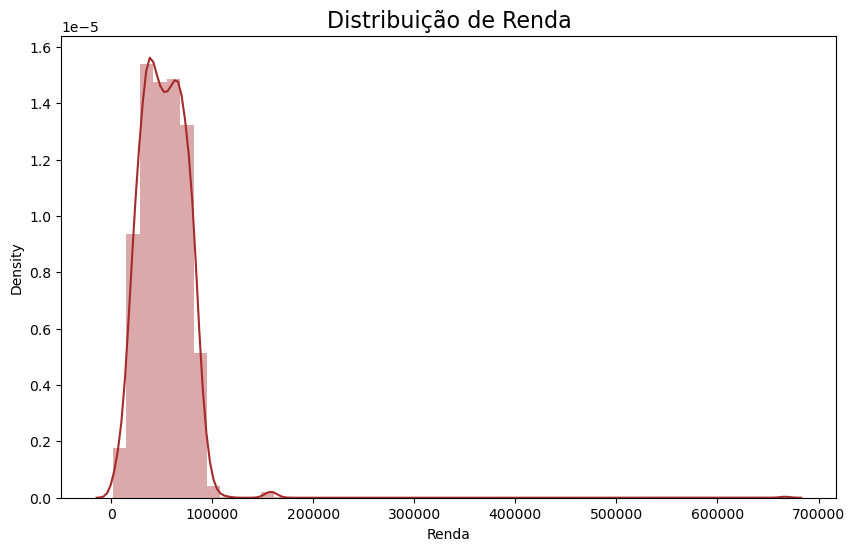

In [16]:
# Visualizando outliers de outra forma
# criando o gráfico de distribuição
plt.figure(figsize = (10, 6)) 
sns.distplot(df['Renda'], color = 'brown')  
plt.title('Distribuição de Renda', size = 16)  
plt.show()

In [17]:
# filtrando os dados e 'removendo' os outliers
# neste caso irei deixar somente os dados que se enquandram nos intervalos
# de quartis criados acima, ou seja, se ele for maior que o limite inferior 
# e menor que o limite superior, irei deixá-los armazenados na variável
# df_novo e assim eu não excluo de fato as linhas, apenas estou armazenando os dados
# que eu quero em uma nova variável
df_novo = df[(df['Renda'] >= lower_bound) & (df['Renda'] <= upper_bound)]

/Users/emersonmouco/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


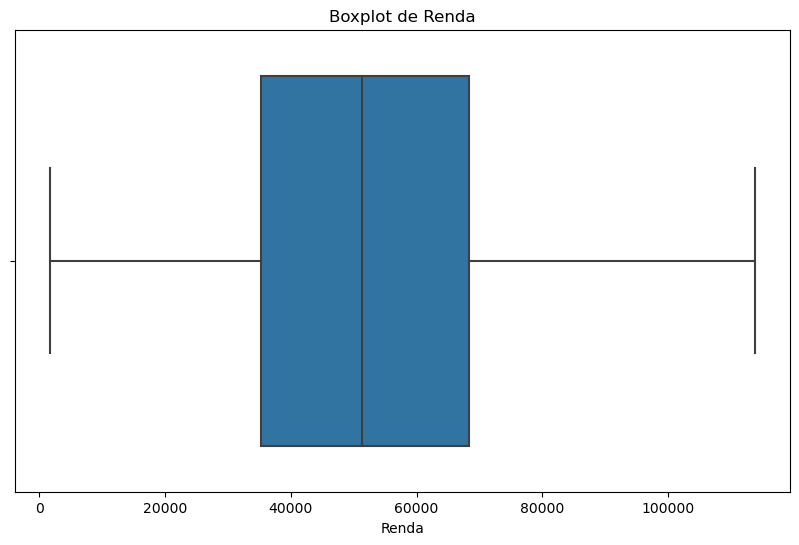

In [18]:
# Agora plotar um boxplot para visualizar se há outliers na coluna 'Renda'
plt.figure(figsize = (10, 6))
sns.boxplot(df_novo['Renda'])
plt.title('Boxplot de Renda')
plt.xlabel('Renda')
plt.show()

/Users/emersonmouco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


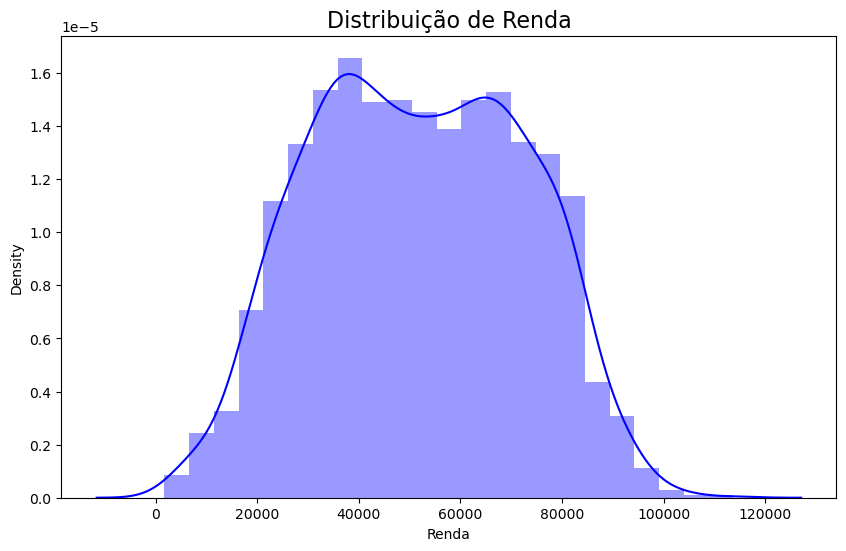

In [19]:
# como visto no bloxpot acima, não há mais a presença de outliers na variável renda
# agora vamos ver a nova distribuição

# Definindo o tamanho da figura
plt.figure(figsize = (10, 6)) 

# Criando o gráfico de distribuição
sns.distplot(df_novo['Renda'], color = 'blue')  

# Definindo o título
plt.title('Distribuição de Renda', size = 16)  

# Exibindo o gráfico
plt.show()

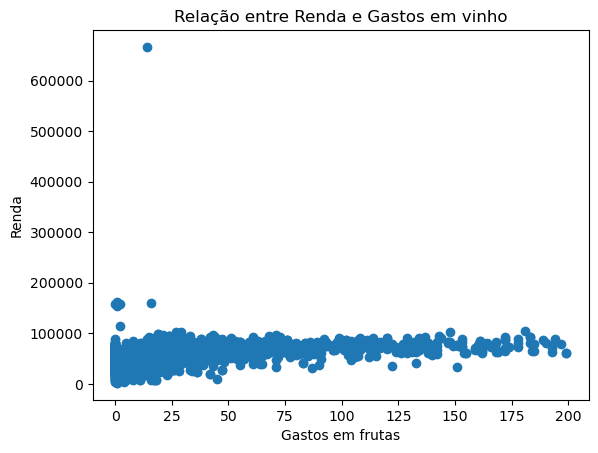

In [20]:
plt.scatter(df['Gasto_Frutas'], df['Renda'])
plt.xlabel('Gastos em frutas')
plt.ylabel('Renda')
plt.title('Relação entre Renda e Gastos em vinho')
plt.show()

In [21]:
X = df['Gasto_Frutas']
y = df['Renda']

In [22]:
model = LinearRegression()
model.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[11 96  1 ...  2  4  2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
scaler = StandardScaler() #Criamos a função scaler
# print(scaler.fit(tabela[['horário']])) #Fazemos o fit dos dados (2D)
df['Gasto_Frutas'] = scaler.fit_transform(df[['Gasto_Frutas']])
print(df['Gasto_Frutas'])

In [23]:
scaler = StandardScaler() #Criamos a função scaler
# print(scaler.fit(tabela[['horário']])) #Fazemos o fit dos dados (2D)
df['Renda'] = scaler.fit_transform(df[['Renda']])
print(df['Renda'])

0       0.124674
1       0.985203
2      -1.115230
3       0.684840
4       0.787609
          ...   
2232   -0.472436
2233    0.223670
2234   -1.065692
2235   -1.548354
2236   -0.379201
Name: Renda, Length: 2237, dtype: float64


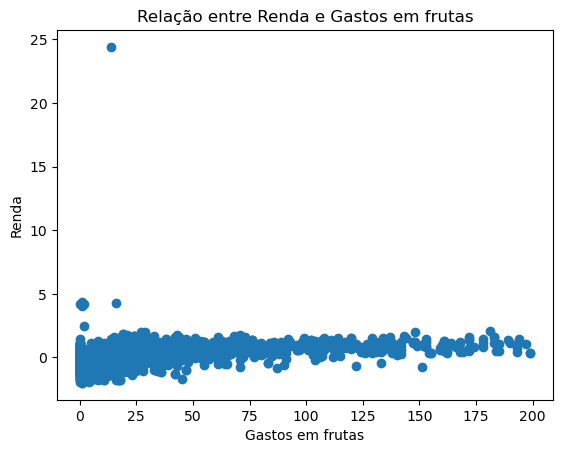

In [25]:
plt.scatter(df['Gasto_Frutas'], df['Renda'])
plt.xlabel('Gastos em frutas')
plt.ylabel('Renda')
plt.title('Relação entre Renda e Gastos em frutas')
plt.show()

In [67]:
X = df[['Renda']]  # 2D (DataFrame)
y = df['Gasto_Frutas']  # 1D (Series)

# Regressão Linear
model = LinearRegression()
model.fit(X, y)

print("Coeficiente (inclinação):", model.coef_[0])
print("Intercepto:", model.intercept_)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [30]:
valores_ausentes = df.isnull().sum().sort_values(ascending = False)

In [31]:
valores_ausentes

Renda                       24
ID                           0
Gasto_Outros                 0
Aceitou_Campanha_5           0
Aceitou_Campanha_4           0
Aceitou_Campanha_3           0
Aceitou_Campanha_2           0
Aceitou_Campanha_1           0
Num_Visitas_Web_Mes          0
Num_Compras_Loja             0
Num_Compras_Catalogo         0
Num_Compras_Web              0
Num_Compras_Promocionais     0
Gasto_Doces                  0
Ano_Nascimento               0
Gasto_Peixes                 0
Gasto_Carnes                 0
Gasto_Frutas                 0
Gasto_Vinhos                 0
Data_Cadastro_Cliente        0
Adolescentes_Em_Casa         0
Criancas_Em_Casa             0
Estado_Civil                 0
Educacao                     0
Aceitou_Campanha_6           0
dtype: int64

In [33]:
df['Renda'] = df['Renda'].fillna(df['Renda'].median())

In [34]:
valores_ausentes = df.isnull().sum().sort_values(ascending = False)

In [79]:
valores_ausentes

ID                          0
Gasto_Outros                0
Aceitou_Campanha_5          0
Aceitou_Campanha_4          0
Aceitou_Campanha_3          0
Aceitou_Campanha_2          0
Aceitou_Campanha_1          0
Num_Visitas_Web_Mes         0
Num_Compras_Loja            0
Num_Compras_Catalogo        0
Num_Compras_Web             0
Num_Compras_Promocionais    0
Gasto_Doces                 0
Ano_Nascimento              0
Gasto_Peixes                0
Gasto_Carnes                0
Gasto_Frutas                0
Gasto_Vinhos                0
Data_Cadastro_Cliente       0
Adolescentes_Em_Casa        0
Criancas_Em_Casa            0
Renda                       0
Estado_Civil                0
Educacao                    0
Aceitou_Campanha_6          0
dtype: int64

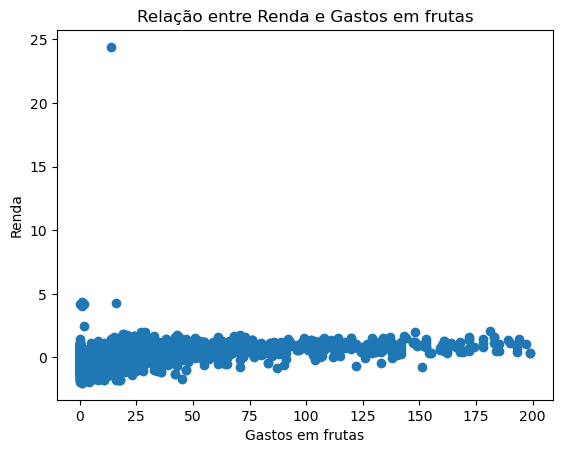

In [36]:
plt.scatter(df['Gasto_Frutas'], df['Renda'])
plt.xlabel('Gastos em frutas')
plt.ylabel('Renda')
plt.title('Relação entre Renda e Gastos em frutas')
plt.show()

In [35]:
X = df[['Renda']]  # 2D (DataFrame)
y = df['Gasto_Frutas']  # 1D (Series)

# Regressão Linear
model = LinearRegression()
model.fit(X, y)

print("Coeficiente (inclinação):", model.coef_[0])
print("Intercepto:", model.intercept_)

Coeficiente (inclinação): 17.094074744601603
Intercepto: 26.27674309216854
